# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [5]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

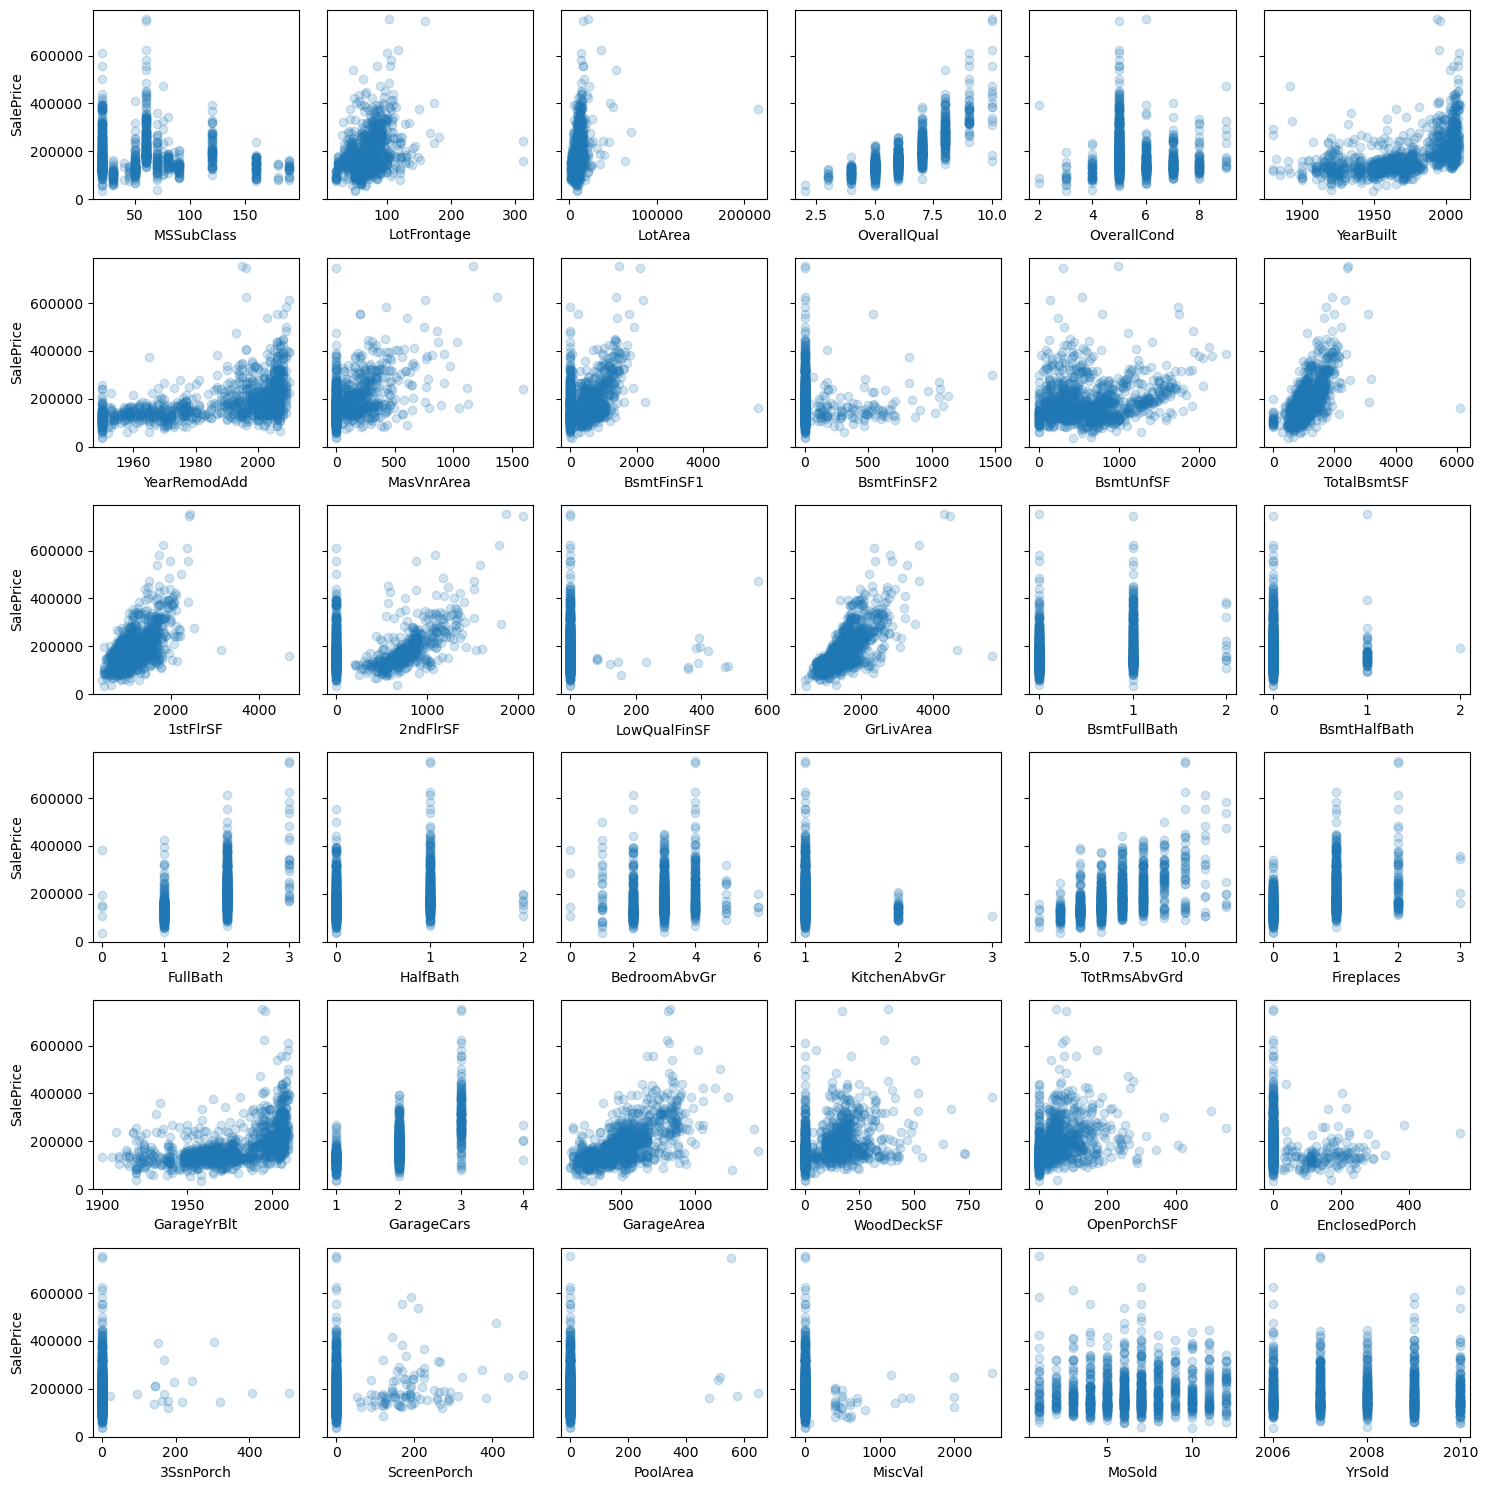

In [7]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

#### Your written answer here

- Shape 1 (Skbkekas, CC BY-SA 3.0, via Wikimedia Commons) resembles **LotFrontage**
- Shape 2 (Derek Zelmer, UCSA) resembles **GrLivArea**
- Shape 3 resembles **YearRemodAdd**

### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

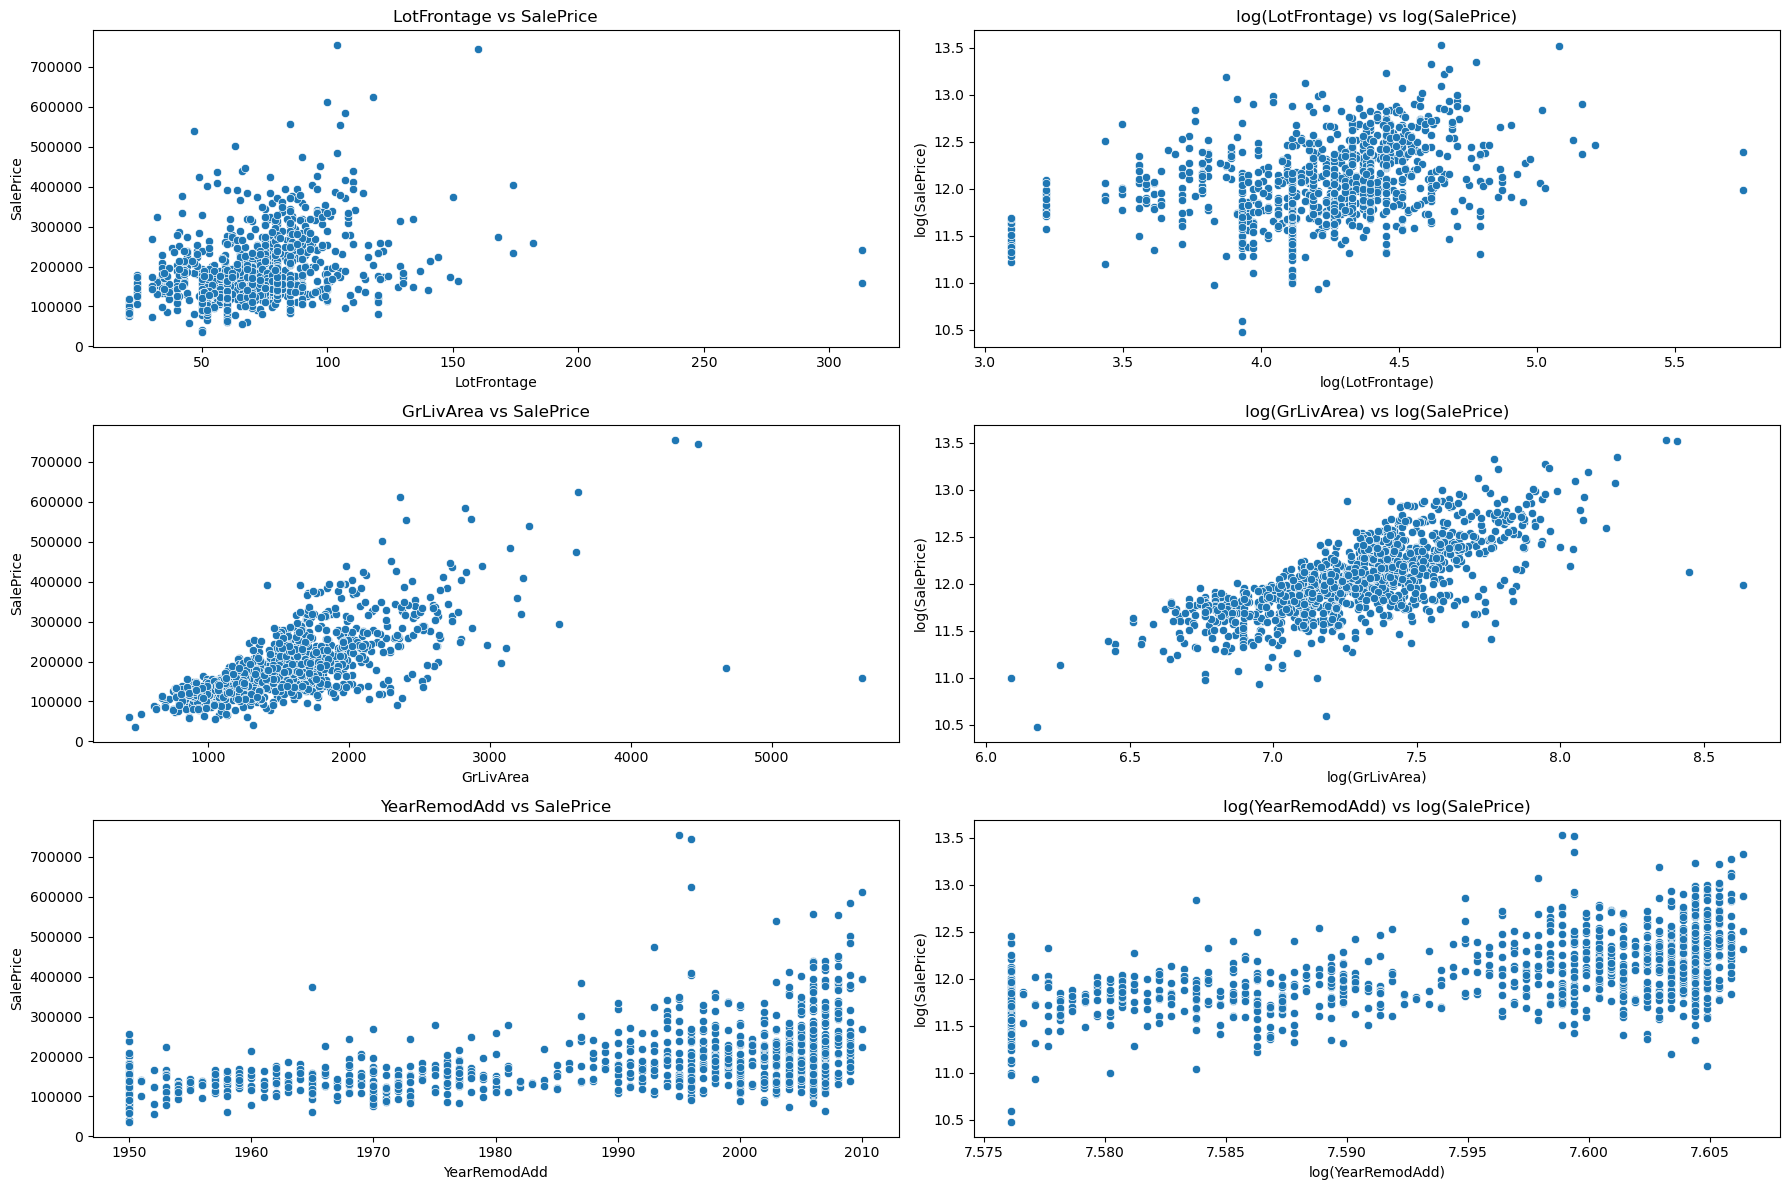

In [12]:
# Your code here

import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
features = ['LotFrontage', 'GrLivArea', 'YearRemodAdd']
target = 'SalePrice'

# Plotting
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    # Raw scatter plot
    plt.subplot(3, 2, 2 * i + 1)
    sns.scatterplot(x=ames[feature], y=ames[target])
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")

    # Log-log scatter plot
    plt.subplot(3, 2, 2 * i + 2)
    # Applying log1p to avoid log(0) and handle missing values
    x_log = np.log1p(ames[feature])
    y_log = np.log1p(ames[target])
    sns.scatterplot(x=x_log, y=y_log)
    plt.title(f"log({feature}) vs log(SalePrice)")
    plt.xlabel(f"log({feature})")
    plt.ylabel("log(SalePrice)")

plt.tight_layout()
plt.show()

Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [15]:
# Your code here - prepare data for modeling

# Dropping rows with missing values in selected columns
df_model = ames[['LotFrontage', 'GrLivArea', 'YearRemodAdd', 'SalePrice']].dropna()

# Shifting YearRemodAdd to make log transformation meaningful
df_model['YearRemodAdd_shifted'] = df_model['YearRemodAdd'] - 1900

# Applying log1p to features and target
X = pd.DataFrame({
    'log_LotFrontage': np.log1p(df_model['LotFrontage']),
    'log_GrLivArea': np.log1p(df_model['GrLivArea']),
    'log_YearRemodAdd': np.log1p(df_model['YearRemodAdd_shifted'])
})

y = np.log1p(df_model['SalePrice'])

# Checking the prepared data
X.head(), y.head()

(    log_LotFrontage  log_GrLivArea  log_YearRemodAdd
 Id                                                  
 1          4.189655       7.444833          4.644391
 2          4.394449       7.141245          4.343805
 3          4.234107       7.488294          4.634729
 4          4.110874       7.448916          4.262680
 5          4.442651       7.695758          4.615121,
 Id
 1    12.247699
 2    12.109016
 3    12.317171
 4    11.849405
 5    12.429220
 Name: SalePrice, dtype: float64)

### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [17]:
# Your code here - build a model

import statsmodels.api as sm

# Adding constant to the features
X_const = sm.add_constant(X)

# Building and fit the OLS model
model = sm.OLS(y, X_const)
results = model.fit()

# Displaying the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     823.3
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          2.32e-282
Time:                        11:19:34   Log-Likelihood:                 100.02
No. Observations:                1121   AIC:                            -192.0
Df Residuals:                    1117   BIC:                            -172.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.7856      0.167     22.667      0.000       3.458       4.113
log_LotFrontage      0.1790      0.021      8.666      0.000       0.138       0.219
log_GrLivArea        0.6697      0.023     29.275      0.000       0.625       0.715
log_YearRemodAdd     0.5943      0.026     23.096      0.000       0.544       0.645
==============================================================================
Omnibus:                      126.447   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.768
Skew:                          -0.557   Prob(JB):                     2.31e-85
Kurtosis:                       5.665   Cond. No.                         243.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

### Your code here - evaluate the model

1. **Model Performance**
- **R-squared 0.689:** About 69% of the variance in SalePrice is explained by the log-transformed features. This is quite solid for housing data.
- **Adj. R-squared 0.688:**	Adjusts for the number of predictors; still high, showing no overfitting due to unnecessary variables.
- **F-statistic	823.3 (p < 0.001):** The model is statistically significant overall.
- **Durbin-Watson 2.075:**	Suggests no strong autocorrelation in residuals.

2. **Interpreting Coefficients (Log-Log Model)**

In a log-log model, the coefficients are interpreted as elasticities. i.e A 1% increase in the feature leads to an approx. β% change in SalePrice.

- **log_LotFrontage	0.179:** A 1% increase in LotFrontage is associated with a 0.179% increase in SalePrice, holding other factors constant.
- **log_GrLivArea 0.670:**	A 1% increase in GrLivArea leads to a 0.67% increase in SalePrice, very impactful.
- **8log_YearRemodAdd 0.594:** A 1% increase in remodeled year (after shifting) corresponds to a 0.594% rise in SalePrice.

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.